In [7]:
import tensorflow as  tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Flatten, Conv2D, MaxPooling2D,GlobalMaxPooling1D,Conv1D
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [8]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)
x_train = x_train / 255.0
x_test = x_test / 255.0





(60000, 28, 28) (60000,)


In [9]:
y_train.shape

(60000,)

In [10]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel("epochs")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel("epochs")
    plt.legend()

# LSTM

In [11]:
def createLSTM():
    model = Sequential()
    model.add(LSTM(192, input_shape=(28,28), activation='relu', return_sequences=True))
    
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.2))
    
    model.add(Dense(32, activation='relu'))

    model.add(Dense(10, activation='softmax'))
    return model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 28, 192)           169728    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 192)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                6176      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 176,234
Trainable params: 176,234
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 54s 894

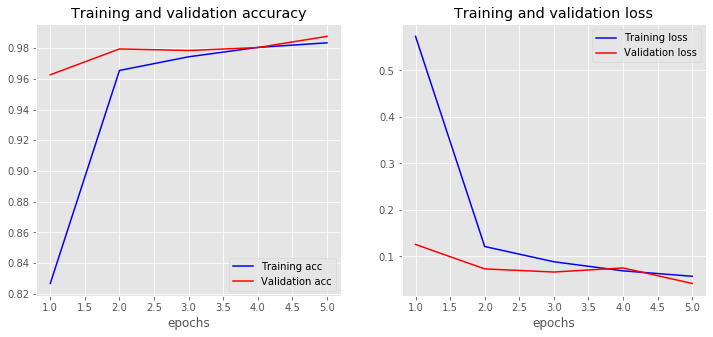

In [15]:
model = createLSTM()
model.summary()
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'])
plot_model(model, to_file='mnist_lstm_model.png',show_shapes=True, show_layer_names=True)
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
plot_history(history)

In [16]:
#adding channel dimension in order to dospatial computations
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

# CNN

In [17]:
def createCNN():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding= "Same", activation='relu',input_shape =(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dense(10, activation='softmax'))
    return model
    
    



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 1,608,778
Trainable params: 1,608,778
Non-trainable params: 0
____________________________________________

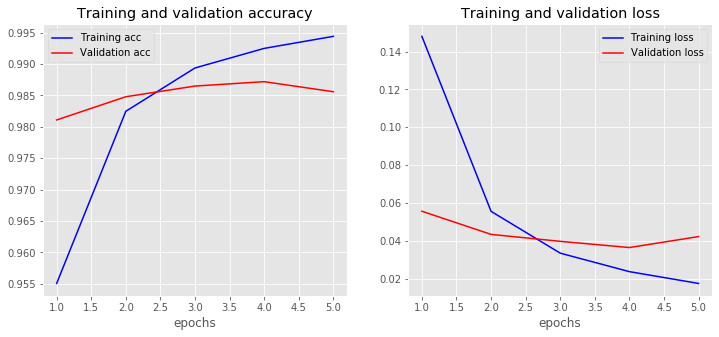

In [19]:
model = createCNN()
model.summary()
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)
model.compile(loss='categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'])
plot_model(model, to_file='mnist_cnn_model.png',show_shapes=True, show_layer_names=True)
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
plot_history(history)

In [21]:
x_train.shape[1:]

(28, 28)